# Can Age and Experience predict the number of hours played in the Players dataset?

Vanessa Mah 76858182

## (1) Data Description

To start, install and load the necessary packages for data manipulation.

In [2]:
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Now, we can load our first dataset from the `players.csv` file using the `read.csv()` function.

In [3]:
url <- "https://raw.githubusercontent.com/vmah1/dsci100_individual_project/refs/heads/main/players.csv"
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


### Datset Overview

The `players` dataset provides insights into a group of players, including their experience level, subscription status, hours played, names, gender, and age. 

Number of Observations: 196 

Number of Variables: 7 


#### Variable Information

| Variable     | Type      | Example Values                   | Meaning                                      |
|--------------|-----------|----------------------------------|----------------------------------------------|
| `experience`   | Character | Amateur, Pro | Player’s skill or experience level           |
| `subscribe`    | Logical   | TRUE / FALSE                    | Whether player has an active subscription    |
| `hashedEmail`  | Character | f8fda41...                     | Unique anonymized player identifier          |
| `played_hours` | Numeric   | 0.0, 30.3, 48.4                 | Total hours played                           |
| `name`         | Character | Morgan, Christian                   | Player’s given name                          |
| `gender`       | Character | Male, Female, Non-binary | Player’s self-reported gender                |
| `Age`          | Numeric   | 9, 21, 58                      | Age of the player in years                                 |


#### Potential Issues in the Data
There are several potential issues that need to be addressed for more accurate analysis:

- **Missing values**: The `Age` variable contains missing values for one player. There is also a possibility that other variables may contain missing values that are not visible.
- **Outliers**: The `played_hours` variable has extreme values (eg. 48.4 hours for one player), while many others report very low playtime. These outliers could skew summary statistics, especially the mean.
- **Imbalanced categories**: The `gender` variable contains diverse categories, but some (eg. Two-Spirited) may be underrepresented.
- **Experience variable**: The `experience` variable should be converted to a factor, as it represents categorical data (eg. "Amateur", "Pro") and is currently stored as a character

#### How the Data Were Collected
The dataset was collected from the PLAIcraft server through both self-reported information and automated tracking.

**Player-Provided Information:**
- `experience`, `name`, `gender`, and `Age`: Provided by players during account creation or profile updates.
- `hashedEmail`: Player email address collected during account registration, then anonymized to for privacy.
- `subscribe`: Collected based on the player's selection of an active subscription during account creation or afterward.

**Automated Tracking:**
- `played_hours`: Automatically tracked by the server based on in-game activity.

In [4]:
SUMMARY

ERROR: Error in eval(expr, envir, enclos): object 'SUMMARY' not found


We can now load our second dataset from the `sessions.csv` file using the `read.csv()` function.

In [5]:
url <- "https://raw.githubusercontent.com/vmah1/dsci100_individual_project/refs/heads/main/sessions.csv"
sessions <- read_csv(url)
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


### Datset Overview

The `sessions` dataset provides details on player sessions, including anonymized player IDs, session start and end times, and timestamps for when the sessions started and ended.

Number of Observations: 1535 

Number of Variables: 5


#### Variable Information

| Variable               | Type      | Example Values                                     | Meaning                                        |
|------------------------|-----------|---------------------------------------------------|------------------------------------------------|
| `hashedEmail`           | Character | bfce3... | Unique anonymized player identifier |
| `start_time`            | Character | 30/06/2024 18:12                                  | Start time of the player session, in date-time format |
| `end_time`              | Character | 30/06/2024 18:24                                  | End time of the player session, in date-time format |
| `original_start_time`   | Numeric   | 1.71977e+12                                        | Original start time in UNIX time (milliseconds) |
| `original_end_time`     | Numeric   | 1.71977e+12                                        | Original start time in UNIX time (milliseconds) |in years                                 |


#### Potential Issues in the Data
There are some potential issues that need to be addressed for more accurate analysis:

- **Missing values**: There may be incomplete session records, though no missing values are apparent.
- **Data consistency**: The dataset uses both human-readable date-times and UNIX timestamps, which may need standardization.

#### How the Data Were Collected
The dataset was collected from the PLAIcraft server through automated data collection methods.

**Player-Provided Information:**
- `hashedEmail`: Player email address collected during account registration, then anonymized to for privacy.

**Automated Tracking:**
- `start_time` and `end_time`: Automatically tracked by the server in human-readable date-time format based on in-game activity.
- `original_start_time` and `original_end_time`: Automatically tracked by the server in UNIX timestamps (milliseconds) based on in-game activity.


In [ ]:
SUMMARY

## (2) Question

The broad question to be answered is: **Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts?**

To refine this question, the specific question is: **Can Age and Experience predict hours played in the Players dataset?**

The data will help address the question of interest by providing insights into how age and experience might influence the hours played by players on the PLAIcraft server. By analyzing these variables, patterns can be identified that reveal whether certain age groups or experience levels are associated with higher player engagement. This information is valuable for targeting the most engaged players in recruitment efforts.

Since this question is specific to the `players` dataset, the `sessions` dataset will not be used in the analysis. Only variables from the `players` dataset, such as `Age`, `experience`, and `played_hours`, will be considered to address the question of predicting player engagement.

To perform minimum wrangling on the `players` dataset for predictive modeling, we can:
1. **Select relevant columns**: Only include the variables `Age`, `experience`, and `played_hours`, which are necessary for the analysis.<br><br>

2. **Convert data types**: Ensure the data is in an appropriate format for modeling:
   - Convert `Age` to an integer to ensure it's represented as a whole number.
   - Convert `experience` to a factor to treat it as a categorical variable.<br><br>

3. **Save the wrangled data**: Save the tidy dataset to a new object called `players_tidy` to use in modeling.

**Note**: 
- THE VARIABLES ARE TIDY CUZ COLUMNS ARE The `Age` variable contains one missing value, but it will be ignored in the analysis since it does not significantly affect the overall modeling process. T

## (3) Exploratory Data Analysis and Visualization

First, load the dataset by referencing the saved object, `players`, to access it for analysis.

In [ ]:
players

Next, perform minimum wrangling on the dataset to turn it into tidy format.

In [6]:
players_tidy <- players |>
  select (Age, experience, played_hours) |>
  mutate(
    Age = as.integer(Age),
    experience = as_factor(experience))

players_tidy

Age,experience,played_hours
<int>,<fct>,<dbl>
9,Pro,30.3
17,Veteran,3.8
17,Veteran,0.0
21,Amateur,0.7
21,Regular,0.1
17,Amateur,0.0
19,Regular,0.0
21,Amateur,0.0
47,Amateur,0.1


Computation of the mean value for each quantitative variable in the dataset can be reported. We also need to remember to take into consideration missing values by using the `na.rm = TRUE` argument to exclude them from the calculations.


In [7]:
mean_values <- players_tidy |>
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE))
mean_values


mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


We can now make a few exploratory visualizations of the data.

A visualization of Age and Hours Played:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


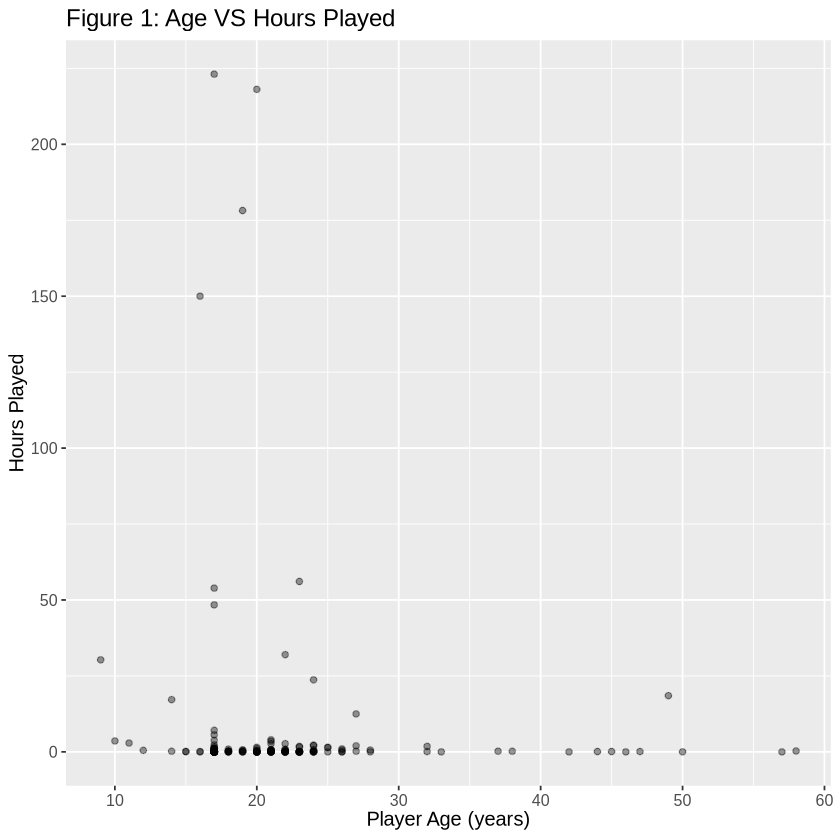

In [29]:

players_age <- ggplot(players, aes(x = Age, y = played_hours)) +
 geom_point(alpha = 0.4) +
 xlab("Player Age (years)") +
 ylab("Hours Played") +
 ggtitle("Figure 1: Age VS Hours Played")+
  theme(text = element_text(size = 12))
players_age

Bar graph to provide a better visualization in the distribution of experience levels

experience,avg_played_hrs,total_hours
<fct>,<dbl>,<dbl>
Pro,2.6000000,36.4
Veteran,0.6479167,31.1
Amateur,6.0174603,379.1
Regular,18.2083333,655.5
Beginner,1.2485714,43.7


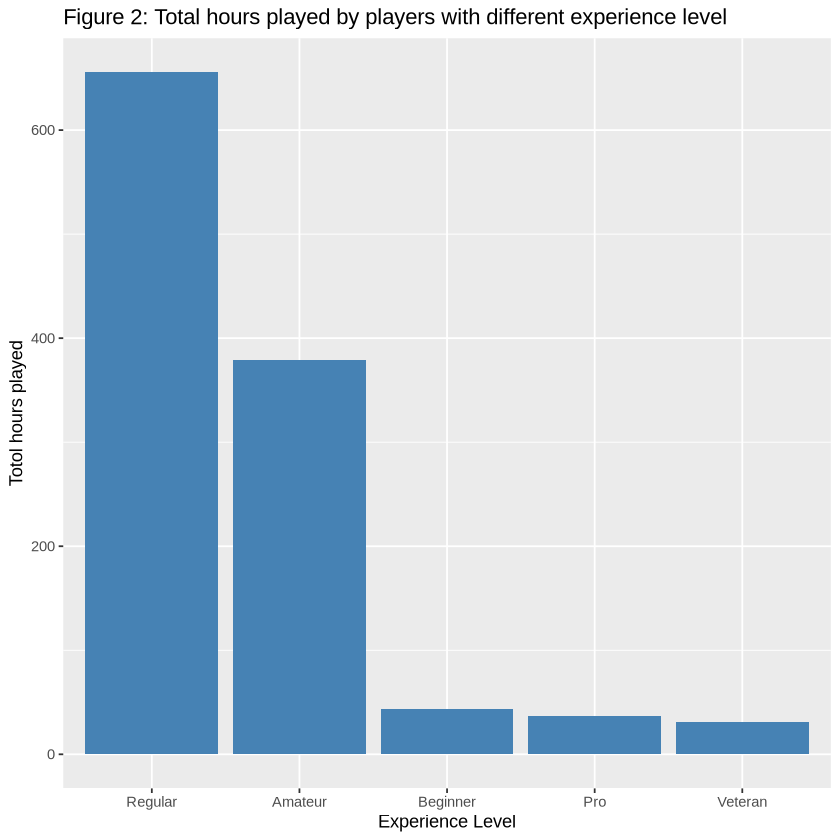

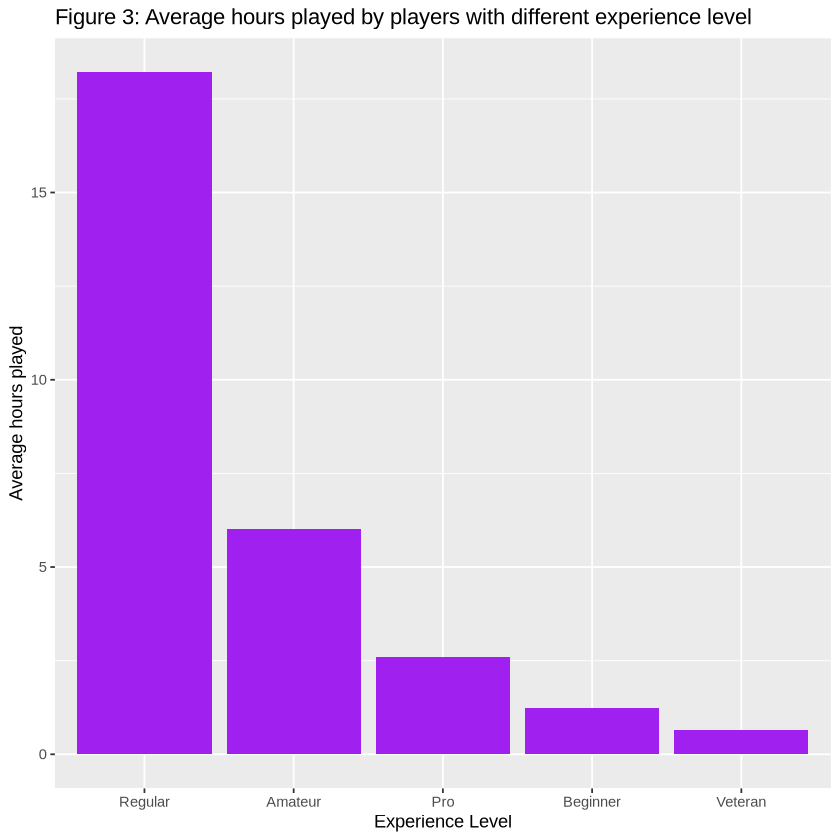

In [27]:
experience_played_hours_summarize <- players_tidy |>
            select(experience, played_hours) |>
            group_by(experience) |>
            summarize(avg_played_hrs = mean (played_hours, na.rm = TRUE),
                      total_hours = sum(played_hours, na.rm = TRUE))|>
            mutate(experience = fct_reorder(experience, total_hours, .desc = TRUE))
experience_played_hours_summarize

played_hours_experience <- experience_played_hours_summarize |>
          ggplot(aes(x = experience, y = total_hours)) +
          geom_bar(stat="identity", fill = "steelblue") +
          labs(title = "Figure 2: Total hours played by players with different experience level",
               x = "Experience Level",
               y = "Totol hours played" )

played_hours_experience

players_average_experience <- experience_played_hours_summarize |>
  mutate(experience = fct_reorder(experience, avg_played_hrs, .desc = TRUE))

avg_played_hours_experience <- players_average_experience |>
          ggplot(aes(x = experience, y = avg_played_hrs)) +
          geom_bar(stat="identity", fill = "purple") +
          labs(title = "Figure 3: Average hours played by players with different experience level",
               x = "Experience Level",
               y = "Average hours played" )

avg_played_hours_experience
